In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

ticker="CL=F"

import pandas as pd 

data=yf.download(ticker, start='2023-07-19', end='2023-07-20', interval='15m')

data.head()

x=data['Close']

type(x)

y=x.values
type(y)


[*********************100%***********************]  1 of 1 completed


numpy.ndarray

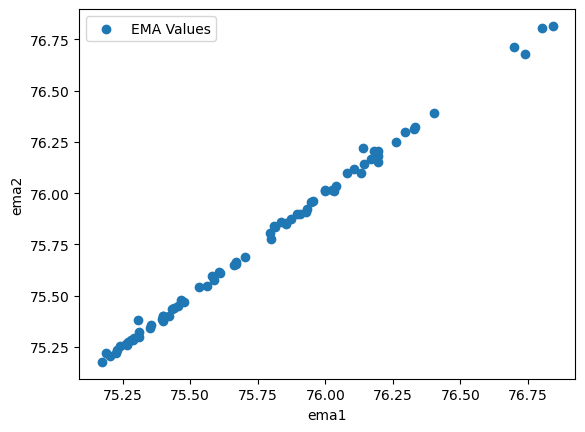

In [86]:
# create a dataframe
stockValues = pd.DataFrame(
    {'Stock_Values': y })
 
# finding EMA
# use any constant value that results in
# good smoothened curve
ema1 = stockValues.ewm(com=0.09).mean()
ema2 = stockValues.ewm(com=0.26).mean()
# Comparison plot b/w stock values & EMA
#plt.plot(stockValues, label="Stock Values")
plt.scatter(ema1, ema2, label="EMA Values")

plt.xlabel("ema1")
plt.ylabel("ema2")
plt.legend()
plt.show()

In [87]:
new=pd.DataFrame(ema1)
new['ema2']=ema2
new.rename(columns={'Stock_Values':'ema1'} )
new['const']=1
X=['const','ema2']
Y=[new['Stock_Values']]


                            OLS Regression Results                            
Dep. Variable:                   ema2   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.384e+04
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           4.19e-99
Time:                        10:10:37   Log-Likelihood:                 189.40
No. Observations:                  75   AIC:                            -374.8
Df Residuals:                      73   BIC:                            -370.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.7630      0.408      1.871   

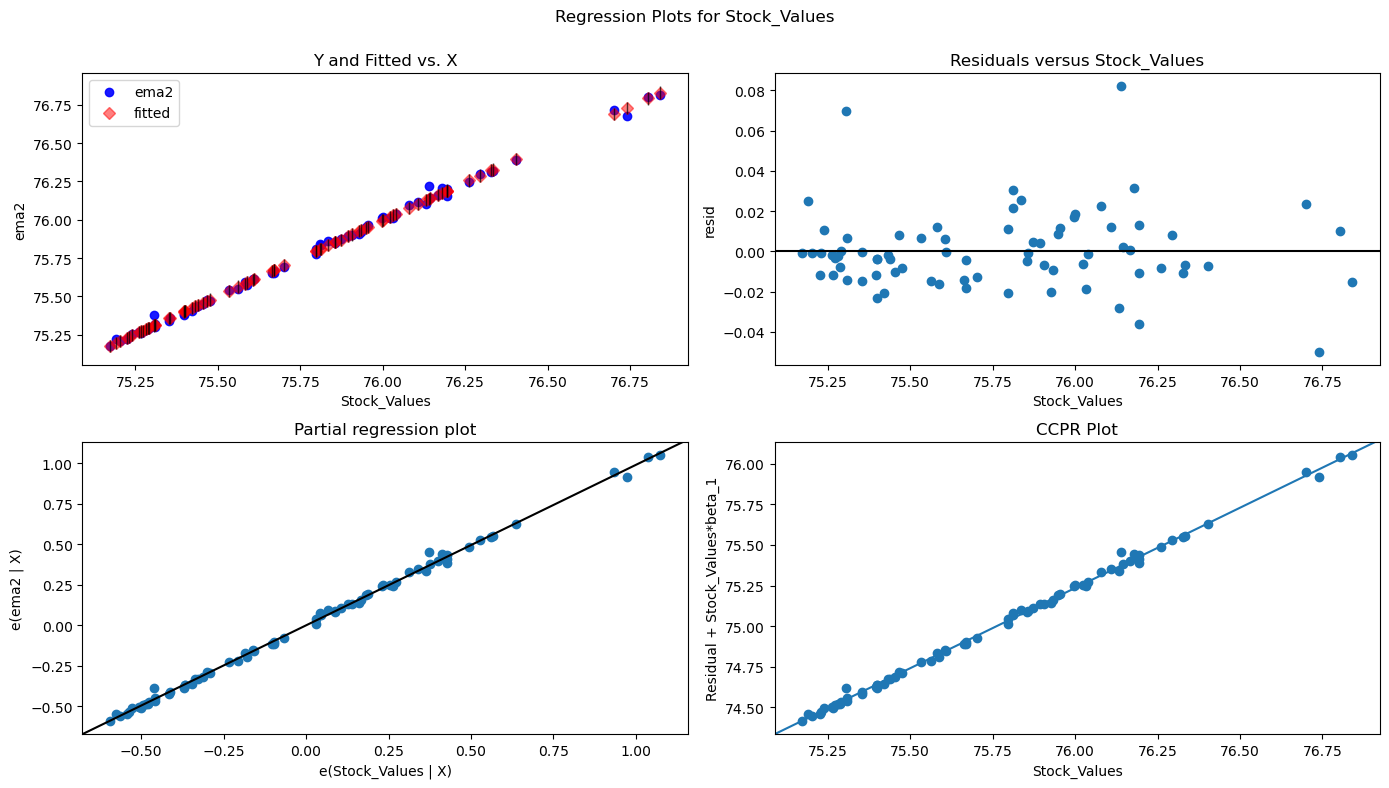

In [88]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
  
# reading the csv file
# data = pd.read_csv('headbrain3.csv')
  
# fit simple linear regression model
linear_model = ols("ema2 ~ Stock_Values", data=new).fit()
  
# display model summary
print(linear_model.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model,
                                    1,
                                    fig=fig)

In [89]:
ans=linear_model.resid

In [90]:
ans

0    -0.003776
1    -0.003776
2    -0.010257
3    -0.001826
4    -0.004024
        ...   
70   -0.000997
71   -0.001053
72   -0.011596
73   -0.011909
74   -0.022983
Length: 75, dtype: float64

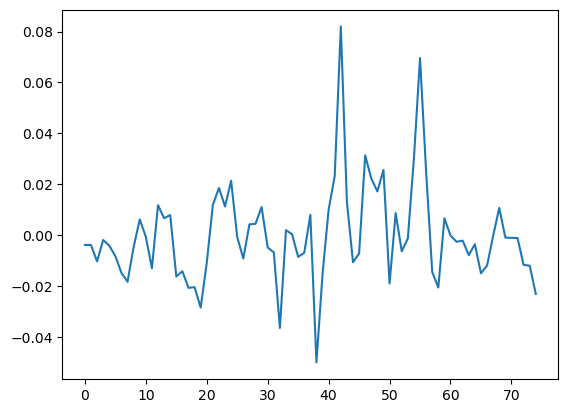

In [91]:
plt.plot(ans)

In [92]:
from statsmodels.tsa.stattools import adfuller

In [93]:
result = adfuller(ans)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.451596
p-value: 0.000003
Critical Values:
	1%: -3.522
	5%: -2.901
	10%: -2.588


In [94]:
import math 
spread= (ema1)-linear_model.params[1]* (ema2)

In [95]:
import scipy.stats as stats

res=stats.zscore(spread)

In [96]:
res

,Stock_Values,const,ema2
0,-0.172950,NaN,NaN
1,-0.172950,NaN,NaN
2,0.186019,NaN,NaN
3,-0.234434,NaN,NaN
4,-0.123585,NaN,NaN
...,...,...,...
70,-0.493200,NaN,NaN
71,-0.519113,NaN,NaN
72,0.029469,NaN,NaN
73,0.083518,NaN,NaN


In [97]:
res["Stock_Values"]

0    -0.172950
1    -0.172950
2     0.186019
3    -0.234434
4    -0.123585
        ...   
70   -0.493200
71   -0.519113
72    0.029469
73    0.083518
74    0.732958
Name: Stock_Values, Length: 75, dtype: float64

In [98]:
ema1


,Stock_Values,ema2,const
0,75.400002,75.400002,1
1,75.400002,75.400002,1
2,75.455076,75.448041,1
3,75.432070,75.433697,1
4,75.439347,75.438703,1
...,...,...,...
70,75.202544,75.207312,1
71,75.172685,75.177698,1
72,75.225271,75.219210,1
73,75.266304,75.259517,1


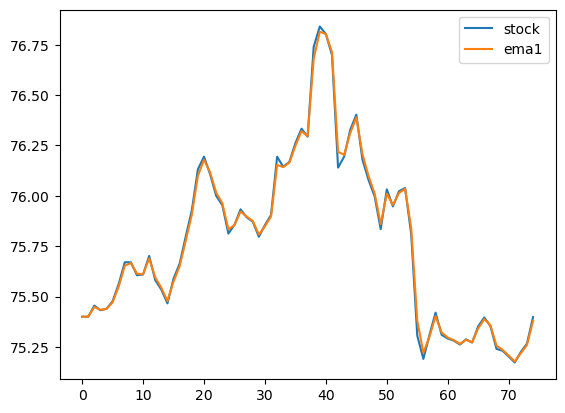

In [99]:
plt.plot(ema1["Stock_Values"])
plt.plot((ema2))
plt.legend(["stock","ema1","ema2"])

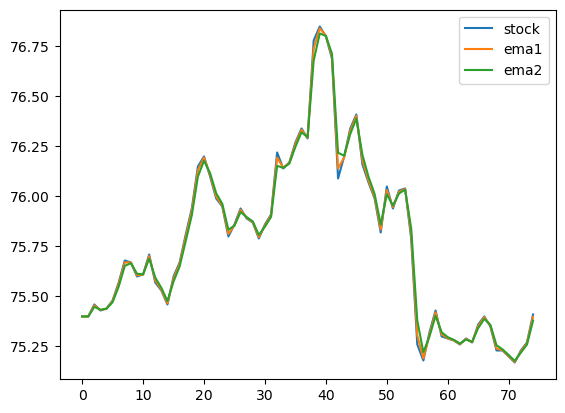

In [116]:
def temp():
    plt.plot(range(0,len(data)),data['Close'])

    plt.plot(ema1["Stock_Values"])
    plt.plot((ema2))
    plt.legend(["stock","ema1","ema2"])
temp()

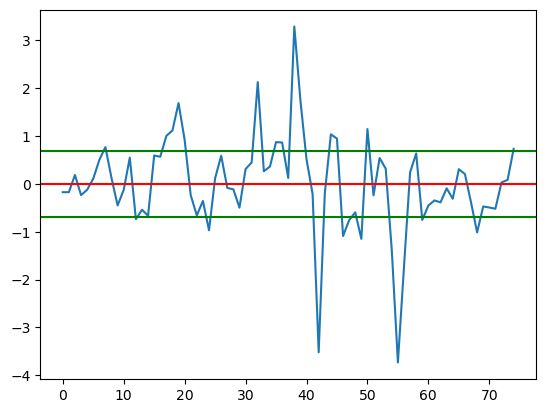

In [115]:
plt.plot(res)
plt.axhline(y=0, c='r')
plt.axhline(y=0.69, c='g', linestyle='-')
plt.axhline(y=-0.69, c='g', linestyle='-')

In [112]:
import numpy as np
import math
abs(res["Stock_Values"]).mean()
           


0.6926474818113652